In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
Flights = pd.read_excel('flights.xlsx')

In [6]:
Flights.dtypes

Date                  object
Flight No             object
Actual                object
Airline               object
Domestic/Int          object
Alliance              object
Country/Region        object
Departure City        object
Departure Airport     object
Depart Code           object
Depart Terminal       object
Arrival City          object
Arrival Airport       object
Arrive Code           object
Arrive Terminal       object
Gate                  object
Depart Shuttle        object
Arrive Shuttle        object
Dep Time              object
Dep Timezone          object
Arr Time              object
Arr Timezone          object
Date Change           object
Duration              object
Dep Delay            float64
Arr Delay            float64
Mileage                int64
Service Class         object
Ticketing Class       object
Seat                  object
Price                 object
Tax                  float64
Manufacturer          object
Aircraft              object
Aircraft Code 

Airlines Flown

In [19]:
Flights["Airline"].unique()

array(['China Eastern Airlines', 'Spring Airlines', 'Shandong Airlines',
       'Juneyao Airlines', 'Dragonair', 'Cathay Pacific Airways',
       'Emirates Airlines', 'Air China', 'Shanghai Airlines',
       'American Airlines', 'AirTran Airways', 'Delta Air Lines',
       'United Airlines', 'Japan Airlines', 'China Southern Airlines',
       'Singapore Airlines', 'Shenzhen Airlines',
       'Republic Airways\ndba US Airways Express', 'US Airways',
       'Shuttle America Airlines\ndba United Express',
       'Republic Airways\ndba United Express',
       'ExpressJet Airlines\ndba United Express', 'Alaska Airlines',
       'Asiana Airlines', 'Vietnam Airlines', 'VietJet Air',
       'Virgin America Airlines', 'Mesa Airlines\ndba United Express',
       'Horizon Air\ndba Alaska Horizon', 'All Nippon Airways',
       'Hainan Airlines', 'Air Busan', 'Dalian Airlines\ndba Air China',
       'Star Flyer', 'Xiamen Airlines',
       'Air Georgian\ndba Air Canada Express', 'Air Canada',
      

In [20]:
Flights['Airline_actual'] = Flights['Airline']

In [28]:
Flights['Airline_sold'] = Flights['Airline']

In [36]:
def replace_airline(old_airline):
    if old_airline == 'United Express':
        return 'United Airlines'
    elif old_airline == 'Delta Connection':
        return 'Delta Air Lines'
    elif old_airline == 'American Eagle':
        return "American Airlines"
    elif old_airline == 'Alaska Horizon':
        return 'Alaska Airlines'
    elif old_airline == 'Air Canada Express':
        return 'Air Canada'
    else:
        return old_airline

In [114]:
for i, row in Flights.iterrows():
    temp = row['Airline'].split('\ndba ')
    Flights.set_value(i, 'Airline_actual', temp[0])
    if  len(temp) == 2:       
        Flights.set_value(i, 'Airline_sold', replace_airline(temp[1]))

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [115]:
Flights["Airline_actual"]

0      China Eastern Airlines
1             Spring Airlines
2             Spring Airlines
3      China Eastern Airlines
4      China Eastern Airlines
5             Spring Airlines
6             Spring Airlines
7           Shandong Airlines
8           Shandong Airlines
9             Spring Airlines
10            Spring Airlines
11           Juneyao Airlines
12                  Dragonair
13                  Dragonair
14     China Eastern Airlines
15     Cathay Pacific Airways
16                  Dragonair
17          Emirates Airlines
18          Emirates Airlines
19          Emirates Airlines
20          Emirates Airlines
21            Spring Airlines
22     China Eastern Airlines
23           Juneyao Airlines
24     China Eastern Airlines
25                  Air China
26                  Air China
27          Shanghai Airlines
28            Spring Airlines
29          American Airlines
                ...          
164               EVA Airways
165             Air Wisconsin
166       

In [116]:
Airline_sold = Flights.groupby('Airline_sold')['Flight No'].count().sort_values()

In [117]:
Airline_actual = Flights.groupby('Airline_actual')['Flight No'].count().sort_values()

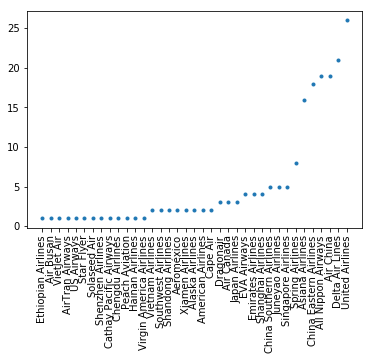

In [110]:
plt.plot(Airline_sold, '.')
plt.xticks(rotation=90)
plt.show()

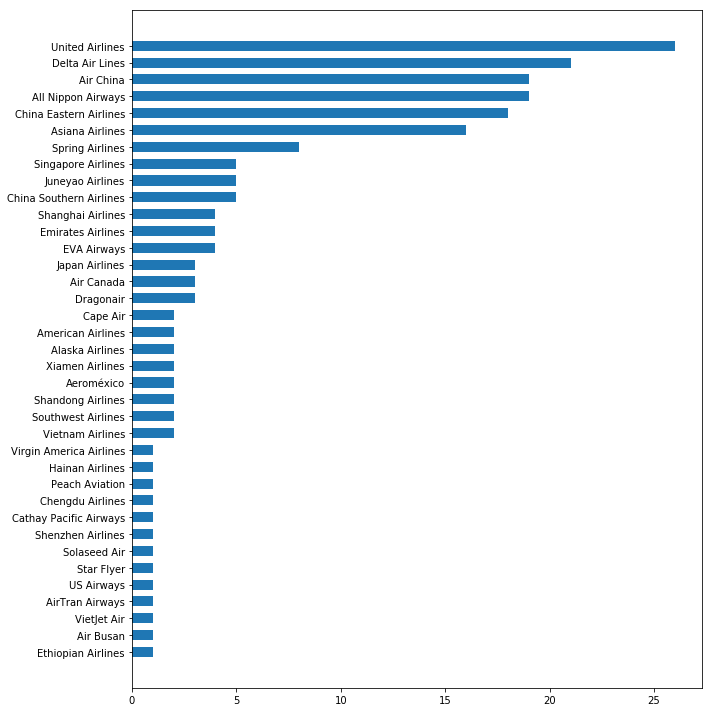

In [112]:
plt.figure(figsize=(10,10))
plt.barh(y = Airline_sold.index, width = Airline_sold, height = 0.6)
plt.tight_layout()

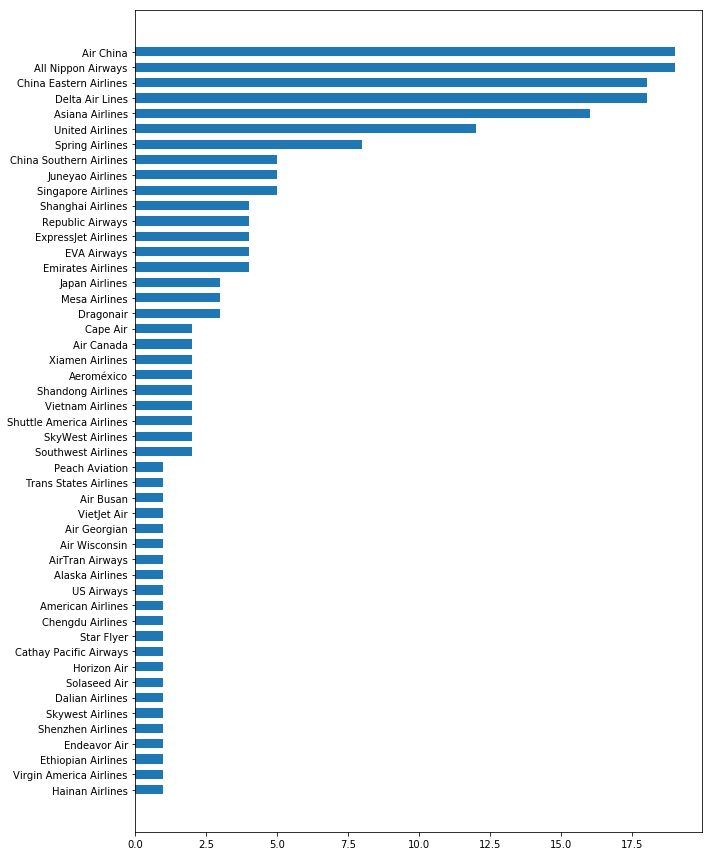

In [121]:
plt.figure(figsize=(10,12))
plt.barh(y = Airline_actual.index, width = Airline_actual, height = 0.6)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(y = Airline_actual.index, width = Airline_actual, height = 0.6)
plt.tight_layout()

In [61]:
print(Airline_sold.index)

Index(['United Airlines', 'Delta Air Lines', 'Air China', 'All Nippon Airways',
       'China Eastern Airlines', 'Asiana Airlines', 'Spring Airlines',
       'Singapore Airlines', 'Juneyao Airlines', 'China Southern Airlines',
       'Shanghai Airlines', 'Emirates Airlines', 'EVA Airways',
       'Japan Airlines', 'Air Canada', 'Dragonair', 'Cape Air',
       'American Airlines', 'Alaska Airlines', 'Xiamen Airlines', 'Aeroméxico',
       'Shandong Airlines', 'Southwest Airlines', 'Vietnam Airlines',
       'Virgin America Airlines', 'Hainan Airlines', 'Peach Aviation',
       'Chengdu Airlines', 'Cathay Pacific Airways', 'Shenzhen Airlines',
       'Solaseed Air', 'Star Flyer', 'US Airways', 'AirTran Airways',
       'VietJet Air', 'Air Busan', 'Ethiopian Airlines'],
      dtype='object', name='Airline_sold')


Aircrafts Count

Airports depart & arrive total